In [1]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 128
batch_size = 4

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    subset="training",
    seed=123,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    target_size=(image_size,image_size),
    seed=123,
    batch_size=batch_size,
    subset="validation",
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "Tomato_Dataset\\val",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [2]:
from keras.layers import Conv2D,MaxPooling2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from keras.models import Sequential
# model = Sequential()
# model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(image_size,image_size,3)))
# model.add(MaxPooling2D((2,2)))
# model.add(Conv2D(64,(3,3),activation="relu"))
# model.add(MaxPooling2D((2,2)))
# model.add(Conv2D(64,(3,3),activation="relu"))
# model.add(Flatten())
# model.add(Dense(64,activation="relu"))
# model.add(Dense(10,activation="softmax"))
# model = Sequential()
# model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3),padding="same"))
# model.add(MaxPooling2D(3,3))
# model.add(Dropout(0.25))
# model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
# model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
# model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.25))
# model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
# model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
# model.add(MaxPooling2D(3,3))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(1024,activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(10,activation="softmax"))

model = Sequential()

#1. KATMAN
model.add(Conv2D(64, 3,activation="relu", data_format="channels_last", kernel_initializer="he_normal", input_shape=(image_size,image_size,3)))
model.add(BatchNormalization())

#2. KATMAN

model.add(Conv2D(128, 3,activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)

### 3. KATMAN
model.add(Conv2D(128, 3,activation="relu"))
model.add(BatchNormalization())


### 4. KATMAN
model.add(Conv2D(64, 3,activation="relu"))
model.add(BatchNormalization())

### 5. KATMAN
model.add(Conv2D(64, 3,activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=2))
model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)

### TAM BAĞLANTI KATMANI
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.6))#%60 unutma işlemi(nöron silme-dropout)

### Çıkış katmanı

model.add(Dense(10,activation="softmax")) #Sınıflama işlemi (7 duygu sınıfı var)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #opmizasyon ve başarım hesaplama metriklerinin belirlenmesi
#model özetini görselleştirelim

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 batch_normalization_1 (Batc  (None, 124, 124, 128)    512       
 hNormalization)                                                 
                                                        

In [3]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["acc"])
history50 = model.fit_generator(
    train,
    epochs=50,
    validation_data=val)

<ipython-input-3-6992529d5f01>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history50 = model.fit_generator(


Epoch 1/50
2000/2000 [==============================] - 549s 269ms/step - loss: 2.2269 - acc: 0.3799 - val_loss: 1.6672 - val_acc: 0.5480
Epoch 2/50
2000/2000 [==============================] - 641s 321ms/step - loss: 1.5690 - acc: 0.5178 - val_loss: 1.7482 - val_acc: 0.5835
Epoch 3/50
2000/2000 [==============================] - 635s 317ms/step - loss: 1.4284 - acc: 0.5580 - val_loss: 1.5494 - val_acc: 0.5805
Epoch 4/50
2000/2000 [==============================] - 172s 86ms/step - loss: 1.2478 - acc: 0.6104 - val_loss: 7.4334 - val_acc: 0.3360
Epoch 5/50
2000/2000 [==============================] - 172s 86ms/step - loss: 1.2174 - acc: 0.6224 - val_loss: 2.5892 - val_acc: 0.4970
Epoch 6/50
2000/2000 [==============================] - 172s 86ms/step - loss: 1.1690 - acc: 0.6426 - val_loss: 0.8646 - val_acc: 0.7560
Epoch 7/50
2000/2000 [==============================] - 172s 86ms/step - loss: 1.1222 - acc: 0.6590 - val_loss: 0.8767 - val_acc: 0.7475
Epoch 8/50
2000/2000 [================

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(test,250)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

<ipython-input-4-23dd18e5bf3d>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test,250)


1000

In [5]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)

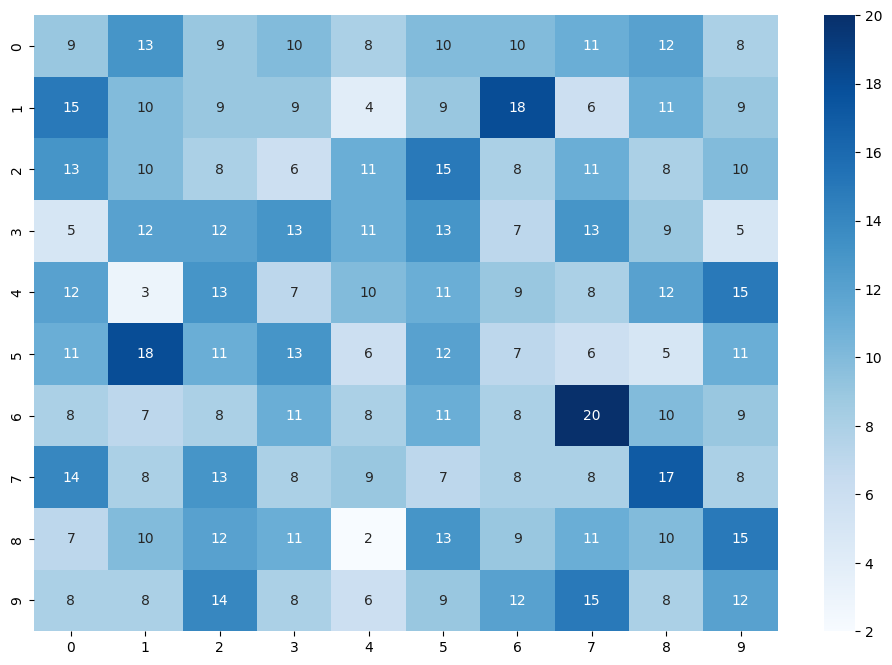

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.show()

In [7]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(test.class_indices.keys()), digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot     0.0882    0.0900    0.0891       100
                        Tomato___Early_blight     0.1010    0.1000    0.1005       100
                         Tomato___Late_blight     0.0734    0.0800    0.0766       100
                           Tomato___Leaf_Mold     0.1354    0.1300    0.1327       100
                  Tomato___Septoria_leaf_spot     0.1333    0.1000    0.1143       100
Tomato___Spider_mites Two-spotted_spider_mite     0.1091    0.1200    0.1143       100
                         Tomato___Target_Spot     0.0833    0.0800    0.0816       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus     0.0734    0.0800    0.0766       100
                 Tomato___Tomato_mosaic_virus     0.0980    0.1000    0.0990       100
                             Tomato___healthy     0.1176    0.1200    0.1188      